# Overcooked exam project

Overcooked is a **common-payoff** game that accounts for really **sparse reward**: indeed, it receives reward only when the task is completed (delivering a soup). We have then to exploit some intermediate rewards given by the completion of different subgoals.

Which are instead the intermediate and final rewards that the game gives at the completion of each subgoal?

In [4]:
from utils import *

overcooked = GeneralizedOvercooked(["cramped_room"])
rewards_dict = overcooked.cur_env.mdp.reward_shaping_params
rewards_dict.update({"SOUP_DELIVERED": 20})
for k, v in rewards_dict.items():
    print(f"{k}: {v}")

Computing MotionPlanner to be saved in C:\Users\follo\OneDrive\Desktop\uniBo\corsi\2nd year\AAS\overcooked_ai\src\overcooked_ai_py\data\planners\cramped_room_mp.pkl
It took 0.07378053665161133 seconds to create mp
PLACEMENT_IN_POT_REW: 3
DISH_PICKUP_REWARD: 3
SOUP_PICKUP_REWARD: 5
DISH_DISP_DISTANCE_REW: 0
POT_DISTANCE_REW: 0
SOUP_DISTANCE_REW: 0
SOUP_DELIVERED: 20


Which are the **actions** that each agent can perform?
- 0: Up
- 1: Down
- 2: Right
- 3: Left
- 4: Stay
- 5: Interact (e.g., pick up, drop, chop, etc.)

In [5]:
actions_dict = {0: "Up", 1: "Down", 2: "Right", 3: "Left", 4: "Stay", 5: "Interact"}

## Some testing

Computing MotionPlanner to be saved in C:\Users\follo\OneDrive\Desktop\uniBo\corsi\2nd year\AAS\overcooked_ai\src\overcooked_ai_py\data\planners\cramped_room_mp.pkl
It took 0.03087615966796875 seconds to create mp


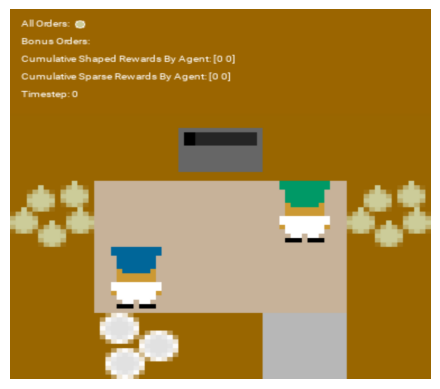

In [6]:
overcooked = GeneralizedOvercooked(["cramped_room"])
render_env(overcooked)

The environment object takes a tuple (or a list) of actions that each agent should perform.
e.g. actions = (1, 2) corresponds to:
- Agent 1 (the one with the blue hat) goes _Down_
- Agent 2 (the one with the green hat) goes _Right_

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -2.,
        2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,
        1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        1., -2.,  1.,  3.,  1.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0., -2.,  2.,  0.,  0.,  0.,  0.,  0.,
        2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,
        0.,  0.,  0.,  0.,  0

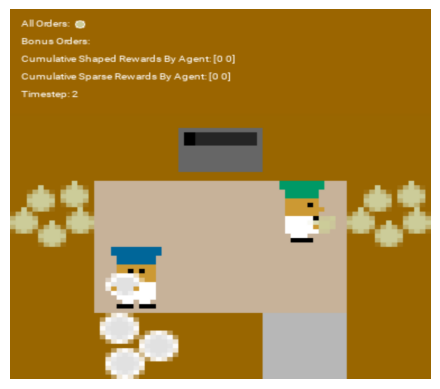

Agent 1 has object: dish
Agent 2 has object: onion

Final Overcooked state:
Players: ((1, 2) facing (0, 1) holding dish@(1, 2), (3, 1) facing (1, 0) holding onion@(3, 1)), Objects: [], Bonus orders: [] All orders: [('onion', 'onion', 'onion')] Timestep: 2


In [7]:
state = overcooked.reset()
print(state["both_agent_obs"])

other_agent_id = state["other_agent_env_idx"]
main_agent_id = 1 - other_agent_id
agents_ids = [main_agent_id, other_agent_id]    
print(f"Main agent ID: {main_agent_id}, Other agent ID: {other_agent_id}")

print(state["overcooked_state"])
for obj in state["overcooked_state"].objects:
    print(f"Object: {obj.name}, Position: {obj.position}, State: {obj.state}")

obs = overcooked.reset()
obs1 = obs["both_agent_obs"][0]
obs2 = obs["both_agent_obs"][1]

# We can use the action space directly, sampling from it 
print("Sampled action for agent 1:", overcooked.action_space.sample())
print("Sampled action for agent 2:", overcooked.action_space.sample())

# here we specify actions directly, to demonstrate the action space
action_1 = 1 # Down for agent 1
action_2 = 2 # Right for agent 2
actions = (action_1, action_2)
overcooked.step(actions)
#render_env(overcooked)

# now we can interact with the environment
action_1 = 5 # Interact
action_2 = 5 # Interact
actions = (action_1, action_2)
_, _, _, info = overcooked.step(actions)
render_env(overcooked)

# Check if agents have objects
for idx, agent in enumerate(overcooked.cur_env.base_env.state.players):
    if agent.has_object():
        print(f"Agent {idx + 1} has object: {agent.held_object.name}")

print("\nFinal Overcooked state:")
print(overcooked.cur_env.base_env.state)


⚠️ [ISSUE] why the indices of the agents change at every run?

#### Visualizing how agents gather rewards by completing (sub)goals

In [ ]:
env = GeneralizedOvercooked(["cramped_room"])

# here we specify actions directly, to demonstrate the action space
_, sparse_reward, done, info = env.step([1, 2])

# now we can interact with the environment
_, sparse_reward, done, info = env.step([5, 5])

# Check if agents have objects
for idx, agent in enumerate(env.cur_env.base_env.state.players):
    if agent.has_object():
        print(f"Agent {idx + 1} has object: {agent.held_object.name}")

# put the first onion
env.step([0, 3])
env.step([4, 0])
_, _, _, info = env.step([4, 5])
print(f"\nFirst onion on the pot (shaped reward: {info['shaped_r_by_agent']})")

# second onion
env.step([4, 2])
env.step([4, 5])
env.step([4, 3])
env.step([4, 0])
env.step([4, 5])
print("Second onion on the pot")

'''
# third onion
env.step([4, 2])
env.step([4, 5])
env.step([4, 3])
env.step([4, 0])
env.step([4, 5])
print("Third onion on the pot")
'''

# start cooking
print("\nStarting to cook the soup...")
env.step([4, 5])
render_env(env)
cooking_time = 0

# prepare to take the soup
env.step([2, 2])
env.step([0, 5])
print("Prepare to take the soup")
render_env(env)

# waiting until cooking isn't finished
for _ in range(30):
    cooking_time += 1
    _, _, _, info = env.step([5, 4])
    if info["shaped_r_by_agent"][0] > 0:
        # viz the agent with the soup
        print(f"Soup picked! Cooking time: {cooking_time} timesteps")
        print(f"shaped_reward: {info['shaped_r_by_agent']}")
        render_env(env)

# deliver soup
env.step([1, 4])
env.step([2, 4])
env.step([1, 4])
_, total_sp_reward, done, info = env.step([5, 4])
print("Delivering the soup...")
render_env(env)
print(f"Sparse reward: {info['sparse_r_by_agent']}, shaped_reward: {info['shaped_r_by_agent']}, done: {done}")
print(f"Team reward: {total_sp_reward}")


## Hands-on

### Typical structure of a Gym program

In [ ]:
episodes = 1
steps = 5
env = GeneralizedOvercooked(["cramped_room"])

# Run multiple episodes to demonstrate the environment
for episode in range(episodes):
    print(f"Episode {episode + 1}")
    obs = env.reset()
    for step in range(steps):
        print(f"Step {step + 1}")
        action_1 = env.action_space.sample()  # Sample action for agent 1
        action_2 = env.action_space.sample()  # Sample action for agent 2
        actions = (action_1, action_2)
        nex_state, reward, done, info = env.step(actions)
        print(f"Actions: {[actions_dict[action_idx] for action_idx in actions]}, Sparse reward: {reward}, Done: {done}")
        render_env(env)
        if (done):	
            print("Episode finished")
            env.reset()
            break	

### Let's implement some RL algo

In [ ]:
from utils import *
actions_dict = {0: "Up", 1: "Down", 2: "Right", 3: "Left", 4: "Stay", 5: "Interact"} 

actions = [a for a in actions_dict.keys()]

### PPO for Multi-agent environments

Our approach: **MAPPO** with **CTDE** (Centralized Training, Decentralized Execution)

- **Execution is decentralized**: each agent acts independently based on its own local observation.

- **Training is centralized**: we use a _shared actor_ and _shared critic_. The critic receives global information by taking _joint_ observations from all agents.

Before fully embracing this paradigm, we begin with a **naive hybrid** version of the algorithm that combines centralized and decentralized training. In this initial setup:
- Both agents share the same value network, but receive distinct observations.
- The actor network operates only on the local observation vector, without incorporating any additional contextual information (such as agent roles).
- We train exclusively on the simplest layout, _Cramped Room_, which may lead the model to overfit to this specific environment.
> (See the next section for how this changes with the addition of a role embedding, layout switching and other additions)



In [ ]:
env = GeneralizedOvercooked(["cramped_room"])
mappo_agents = MAPPO(env, (96, ), len(actions), 2, reward_schedule="exp")

#### First run in cramped room

In [ ]:
mappo_agents.learn(200000)

In [ ]:
mappo_agents.rollout_with_gif("my_episode.gif")

#### Quick policy/actor test

In [ ]:
env.reset()

obs, _, _, info = env.step((1, 2))
render_env(env)
obs = obs["both_agent_obs"]
obs_A1 = obs[0]
obs_A2 = obs[1]
print("Printing action probs. for agent 2:")
action_probs = mappo_agents.actor.predict(np.array([obs_A2]))
for action_idx, p in zip(actions, action_probs[0]):
    print(f"Action: {actions_dict[action_idx]}, Prob: {p:.4f}")

#### Testing the model at inference time
We want to get at least 50 as mean reward across multiple episodes.

In [ ]:
env = GeneralizedOvercooked(["cramped_room"])
episodes = 20
steps = env.cur_env.base_env.horizon # 400

all_episode_rewards = []

for ep in range(episodes):
    obs = env.reset()
    ep_cum_rew = 0

    for s in range(steps): #TODO for num_agents
        obs = obs["both_agent_obs"]
        obs_A1 = obs[0]
        obs_A2 = obs[1]

        # Get unbatched probabilities
        action_probs_A1 = mappo_agents.actor.predict(np.array([obs_A1]), verbose=0)[0]  # shape (N,)
        action_probs_A2 = mappo_agents.actor.predict(np.array([obs_A2]), verbose=0)[0]

        # Re-wrap for batch input to categorical sampling
        action_A1 = tf.random.categorical(tf.math.log([action_probs_A1]), 1)[0, 0].numpy()
        action_A2 = tf.random.categorical(tf.math.log([action_probs_A2]), 1)[0, 0].numpy()

        next_obs, total_sp_reward, done, info = env.step((action_A1, action_A2))
        shaped_reward = info["shaped_r_by_agent"]
        ep_cum_rew += total_sp_reward + np.sum(shaped_reward)

        obs = next_obs
        if done:
            break     

    all_episode_rewards.append(ep_cum_rew)
    print(f"Episode {ep+1}: Reward = {ep_cum_rew}")

# Final summary
mean_reward = np.mean(all_episode_rewards)
std_reward = np.std(all_episode_rewards)
print(f"\nEvaluation over {episodes} episodes")
print(f"Mean Total Reward: {mean_reward:.2f}")
print(f"Std Dev: {std_reward:.2f}")

#### Saving/loading models

In [ ]:
#mappo_agents.actor.save("saved_models/actor_model_cramped.keras")
#mappo_agents.critic.save("saved_models/critic_model_cramped.keras")

In [ ]:
from tensorflow.keras.models import load_model

actor = load_model("saved_models/actor_model_cramped.keras")
critic = load_model("saved_models/critic_model_cramped.keras")

#### Testing on another layout
A slightly complex one, named "Asymmetric advantages".

In [ ]:
env = GeneralizedOvercooked(["asymmetric_advantages"])
episodes = 20
steps = env.cur_env.base_env.horizon # 400

all_episode_rewards = []

for ep in range(episodes):
    obs = env.reset()
    ep_cum_rew = 0

    for s in range(steps): #TODO for num_agents
        obs = obs["both_agent_obs"]
        obs_A1 = obs[0]
        obs_A2 = obs[1]

        # Get unbatched probabilities
        action_probs_A1 = mappo_agents.actor.predict(np.array([obs_A1]), verbose=0)[0]  # shape (N,)
        action_probs_A2 = mappo_agents.actor.predict(np.array([obs_A2]), verbose=0)[0]

        # Re-wrap for batch input to categorical sampling
        action_A1 = tf.random.categorical(tf.math.log([action_probs_A1]), 1)[0, 0].numpy()
        action_A2 = tf.random.categorical(tf.math.log([action_probs_A2]), 1)[0, 0].numpy()

        next_obs, total_sp_reward, done, info = env.step((action_A1, action_A2))
        shaped_reward = info["shaped_r_by_agent"]
        ep_cum_rew += total_sp_reward + np.sum(shaped_reward)

        obs = next_obs
        if done:
            break     

    all_episode_rewards.append(ep_cum_rew)
    print(f"Episode {ep+1}: Reward = {ep_cum_rew}")

# Final summary
mean_reward = np.mean(all_episode_rewards)
std_reward = np.std(all_episode_rewards)
print(f"\nEvaluation over {episodes} episodes")
print(f"Mean Total Reward: {mean_reward:.2f}")
print(f"Std Dev: {std_reward:.2f}")

mean reward = 6

#### Curriculum learning

Since our model overfits on cramped_room, we're going to fine-tune it on tougher layouts, trying to increase its generalization abilities. In other words, we started from an easy task, learning a decent policy. Then we want to transfer that policy to a harder task, and continuing learning.

The second layout we'll try is asymmetric_advantages.

In [ ]:
aa_env = GeneralizedOvercooked(["asymmetric_advantages"])
mappo_agents = MAPPO(aa_env, (96, ), len(actions), 2)
mappo_agents.actor = actor
mappo_agents.critic = critic

In [ ]:
mappo_agents.learn(50000)

In [ ]:
aa_env = GeneralizedOvercooked(["asymmetric_advantages"])
episodes = 10
steps = aa_env.cur_env.base_env.horizon # 400

all_episode_rewards = []

for ep in range(episodes):
    obs = aa_env.reset()
    ep_cum_rew = 0

    for s in range(steps): #TODO for num_agents
        obs = obs["both_agent_obs"]
        obs_A1 = obs[0]
        obs_A2 = obs[1]

        # Get unbatched probabilities
        action_probs_A1 = mappo_agents.actor.predict(np.array([obs_A1]), verbose=0)[0]  # shape (N,)
        action_probs_A2 = mappo_agents.actor.predict(np.array([obs_A2]), verbose=0)[0]

        # Re-wrap for batch input to categorical sampling
        action_A1 = tf.random.categorical(tf.math.log([action_probs_A1]), 1)[0, 0].numpy()
        action_A2 = tf.random.categorical(tf.math.log([action_probs_A2]), 1)[0, 0].numpy()

        next_obs, total_sp_reward, done, info = aa_env.step((action_A1, action_A2))
        shaped_reward = info["shaped_r_by_agent"]
        ep_cum_rew += total_sp_reward + np.sum(shaped_reward)

        obs = next_obs
        if done:
            break     

    all_episode_rewards.append(ep_cum_rew)
    print(f"Episode {ep+1}: Reward = {ep_cum_rew}")

# Final summary
mean_reward = np.mean(all_episode_rewards)
std_reward = np.std(all_episode_rewards)
print(f"\nEvaluation over {episodes} episodes")
print(f"Mean Total Reward: {mean_reward:.2f}")
print(f"Std Dev: {std_reward:.2f}")

#### Let's try full **CTDE** approach + **role** enhancement
There is always room for improvement. In this section, as said before, we introduce a more refined version of our MAPPO algorithm that includes the following enhancements:

- **Fully centralized training**: the value network now receives the joint observation vector (shape: _192)_, enabling a global view of the environment to inform training more effectively.

- **Role-aware policy**: the actor network takes an augmented input composed of the original _96-dimensional_ observation plus an _8-dimensional_ role embedding, resulting in a combined input vector of length _104_.

- **Layout switching**: The learning process now incorporates multiple layouts, alternated throughout training. This strategy helps prevent overfitting to a single environment and mitigates catastrophic forgetting, which we previously observed when using _curriculum learning_.

- **Reward schedule**: Intermediate rewards assigned to each agent gradually decrease over the course of training, following either a _linear_ or _exponential_ decay.

Some implementation details:
- *512* is our number of steps per episode: it is a clean power-of-two factor of 4096 (for batch stability and performance).
- *8* episodes per rollout (4096//512) strikes a good balance between:
    - Sample efficiency (fewer resets, longer episodes)
    - Variance control (averaging over multiple episodes)
    - Avoiding overfitting to specific episodic idiosyncrasies

In [1]:
from utils import *

# Initialize vars
actions_dict = {0: "Up", 1: "Down", 2: "Right", 3: "Left", 4: "Stay", 5: "Interact"}
actions = [a for a in actions_dict.keys()]
obs_dim = (96, )
num_agents = 2

# Create the environment and agents
env = GeneralizedOvercooked(["cramped_room", "asymmetric_advantages", "bottleneck"], horizon=400)
mappo_agents = MAPPO2(env, obs_dim, len(actions), num_agents)

# Total timesteps for training
num_rollouts = 300 # number of rollouts to train on
ts_per_batch = mappo_agents.ts_per_batch  # default: 4096
total_timesteps = num_rollouts * ts_per_batch  # Total timesteps for training

# Learn from the environment
mappo_agents.learn(total_timesteps = total_timesteps)

▶ Starting learning process!
PHASE 1️⃣: cramped room

Rollout: 1
 📦 Gathering transitions...
 📖 Learning...
 ➗ Average return: 3.273

Rollout: 2
 📦 Gathering transitions...
 📖 Learning...
 ➗ Average return: 2.955

Rollout: 3
 📦 Gathering transitions...
 📖 Learning...
 ➗ Average return: 5.409

Rollout: 4
 📦 Gathering transitions...
 📖 Learning...
 ➗ Average return: 4.727

Rollout: 5
 📦 Gathering transitions...
 📖 Learning...
 ➗ Average return: 3.955

Rollout: 6
 📦 Gathering transitions...
 📖 Learning...
 ➗ Average return: 4.000

Rollout: 7
 📦 Gathering transitions...
 📖 Learning...
 ➗ Average return: 5.864

Rollout: 8
 📦 Gathering transitions...
 📖 Learning...
 ➗ Average return: 5.727

Rollout: 9
 📦 Gathering transitions...
  🍛 Dish delivered! 😍
 📖 Learning...
 ➗ Average return: 7.500

Rollout: 10
 📦 Gathering transitions...
 📖 Learning...
 ➗ Average return: 9.318

Rollout: 11
 📦 Gathering transitions...
 📖 Learning...
 ➗ Average return: 3.955

Rollout: 12
 📦 Gathering transitions...
 📖

In [ ]:
print("avg return per rollout:")
for layout, returns in mappo_agents.avg_return_per_rollout.items():
    print(f"Layout: {layout}, Avg Returns: {np.mean(returns)}")

##### Save models and learned role embeddings

In [3]:
# Save models
mappo_agents.actor.save("saved_models/actor_model.keras")
mappo_agents.critic.save("saved_models/critic_model.keras")

# Save learned role embeddings
#mappo_agents.save_role_embeddings("saved_models/role_embeddings_ls.pkl")

##### Load models

In [4]:
from tensorflow.keras.models import load_model

actor = load_model("saved_models/actor_model.keras")
critic = load_model("saved_models/critic_model.keras")

#roles_embeddings = mappo_agents.load_role_embeddings("saved_models/role_embeddings_ls.pkl")

##### Testing

In [ ]:
# Create the environment and agents
env = GeneralizedOvercooked(["cramped_room"], horizon=400)
mappo_agents = MAPPO(env, obs_dim, len(actions), num_agents)

In [8]:
def rollout_with_gif(env, actor, num_agents, gif_path="episode.gif"):
        frames = []
        obs_n = env.reset()["both_agent_obs"]
        done = False
        step = 0

        while not done and step < env.cur_env.base_env.horizon:
            frame = env.render()
            frames.append(frame)

            actions = []
            for i in range(num_agents):
                obs_i = tf.convert_to_tensor([obs_n[i]], dtype=tf.float32)
                probs = actor(obs_i).numpy()[0]
                action = tf.random.categorical(tf.math.log([probs]), 1)[0, 0].numpy()
                actions.append(int(action))

            next_obs, _, done, _ = env.step(actions)
            obs_n = next_obs["both_agent_obs"]
            step += 1

        imageio.mimsave(gif_path, frames, fps=5)
        print(f"GIF saved as {gif_path}")

rollout_with_gif(env, actor, num_agents)

GIF saved as episode.gif


In [1]:
from utils import *

actions_dict = {0: "Up", 1: "Down", 2: "Right", 3: "Left", 4: "Stay", 5: "Interact"}
actions = [a for a in actions_dict.keys()]
obs_dim = (96, )
num_agents = 2

In [5]:
actor = mappo_agents.actor
critic = mappo_agents.critic

In [ ]:
env = GeneralizedOvercooked(["bottleneck"])
episodes = 10
steps = env.cur_env.base_env.horizon # 400

all_episode_rewards = []

for ep in range(episodes):
    obs = env.reset()
    ep_cum_rew = 0

    for s in range(steps):
        obs = obs["both_agent_obs"]
        obs_A1 = obs[0]
        obs_A2 = obs[1]

        # Get unbatched probabilities
        action_probs_A1 = actor.predict(np.array([obs_A1]), verbose=0)[0]
        action_probs_A2 = actor.predict(np.array([obs_A2]), verbose=0)[0]

        # Re-wrap for batch input to categorical sampling
        action_A1 = tf.random.categorical(tf.math.log([action_probs_A1]), 1)[0, 0].numpy()
        action_A2 = tf.random.categorical(tf.math.log([action_probs_A2]), 1)[0, 0].numpy()

        next_obs, total_sp_reward, done, info = env.step((action_A1, action_A2))
        shaped_reward = info["shaped_r_by_agent"]
        ep_cum_rew += total_sp_reward + np.sum(shaped_reward)

        obs = next_obs
        if done:
            break     

    all_episode_rewards.append(ep_cum_rew)
    print(f"Episode {ep+1}: Reward = {ep_cum_rew}")

# Final summary
mean_reward = np.mean(all_episode_rewards)
std_reward = np.std(all_episode_rewards)
print(f"\nEvaluation over {episodes} episodes")
print(f"Mean Total Reward: {mean_reward:.2f}")
print(f"Std Dev: {std_reward:.2f}")

Episode 1: Reward = 3
Episode 2: Reward = 3
Episode 3: Reward = 0
Episode 4: Reward = 0


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000025EE2153AC0>
Traceback (most recent call last):
  File "C:\Users\follo\AppData\Local\Programs\Python\Python310\lib\weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


#### Fine-tuning

In [1]:
# Create the environment and agents
from utils import *
from tensorflow.keras.models import load_model

actions_dict = {0: "Up", 1: "Down", 2: "Right", 3: "Left", 4: "Stay", 5: "Interact"}
actions = [a for a in actions_dict.keys()]
obs_dim = (96, )
num_agents = 2

In [ ]:
env = GeneralizedOvercooked(["cramped_room", "asymmetric_advantages", "bottleneck"], horizon=400)
mappo_agents = MAPPO(env, obs_dim, len(actions), num_agents, fine_tune=True)

# Load the previously saved models
mappo_agents.actor = load_model("saved_models/actor_model.keras")
mappo_agents.critic = load_model("saved_models/critic_model.keras")

# Choosing #rollouts and #total_steps
num_rollouts = 200 # number of rollouts to train on
ts_per_batch = mappo_agents.ts_per_batch  # default: 4096
total_timesteps = num_rollouts * ts_per_batch  # Total timesteps for training

# Learn from the environment
mappo_agents.learn(total_timesteps = total_timesteps)

▶ Starting learning process!
PHASE 1️⃣: cramped room
🎲 Layout sampled: cramped_room

Rollout: 1
 📦 Gathering transitions...
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
 📖 Learning...
 ➗ Average return: 35.955

🎓 Phase 2 – Interleaved layouts
🎲 Layout sampled: asymmetric_advantages

Rollout: 2
 📦 Gathering transitions...
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
  🍛 Dish delivered! 😍
 📖 Learning...
 ➗ 